In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from pandas.api.types import CategoricalDtype
import matplotlib.image as image
from PIL import Image

In [ ]:
sns.set(rc={'figure.figsize':(6,4)})

In [ ]:
# Data Upload
ab_nyc = pd.read_csv('AB_NYC_2019.csv')
ab_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
ab_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# we can see from this info ; there are many empty cells
ab_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Let's fill the NaN data in the 'name' and 'host_name' columns as 'Unknown' in the data set,
# and fill the rows with NaN in the 'last_review' and 'reviews_per_month' data as '0'
ab_nyc[['name','host_name']] = ab_nyc[['name','host_name']].fillna('Unknown')
ab_nyc[['last_review','reviews_per_month']] = ab_nyc[['last_review','reviews_per_month']].fillna('0')


In [ ]:
ab_nyc.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
ab_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
# It's illogical to have a minimum price to be 0
# we can delete them or or we can fill in the averages of the prices
# we will decide based on how many such data there are
(ab_nyc['price'] == 0).sum()

11

In [ ]:
# if we delete these 11 data, there will be no problem
ab_nyc = ab_nyc[ab_nyc['price'] != 0]


In [ ]:
(ab_nyc['price'] == 0).sum()

0

In [ ]:
ab_nyc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
ab_nyc["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
ab_nyc["room_type"].value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

In [ ]:
ab_nyc["room_type"].head()

0       Private room
1    Entire home/apt
2       Private room
3    Entire home/apt
4    Entire home/apt
Name: room_type, dtype: object

In [ ]:
ab_nyc["price"].unique()

array([  149,   225,   150,    89,    80,   200,    60,    79,   135,
          85,   120,   140,   215,    99,   190,   299,   130,   110,
          44,   180,    50,    52,    55,    70,    35,    40,    68,
         115,   151,   228,   144,    69,    49,   375,   250,   275,
         230,    51,    65,   105,    95,   145,   285,    94,   800,
         131,    98,   100,   125,   175,   500,   101,   220,    59,
         350,   199,   325,   235,   170,   400,    75,    90,   185,
          77,    76,   160,   195,   156,   219,   475,   165,   196,
          83,   123,   265,   249,   121,    45,    71,    64,   159,
         189,   239,   305,   155,    92,    36,    37,   205,    39,
         390,   129,   212,   124,   122,   109,   575,   229,   169,
         113,   179,   349,   139,   650,    67,   599,   211,   290,
          87,   395,   260,    97,   132,   141,   495,   259,    96,
         295,   451,   300,    42,   255,    72,    88,   450,   198,
          46,    33,

In [ ]:
ab_nyc["price"].value_counts()

100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
3210       1
4160       1
1046       1
331        1
338        1
Name: price, Length: 673, dtype: int64

In [ ]:
ab_nyc["price"].head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

<ipython-input-46-4eccc6496ab4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ab_nyc.corr(), annot=True);


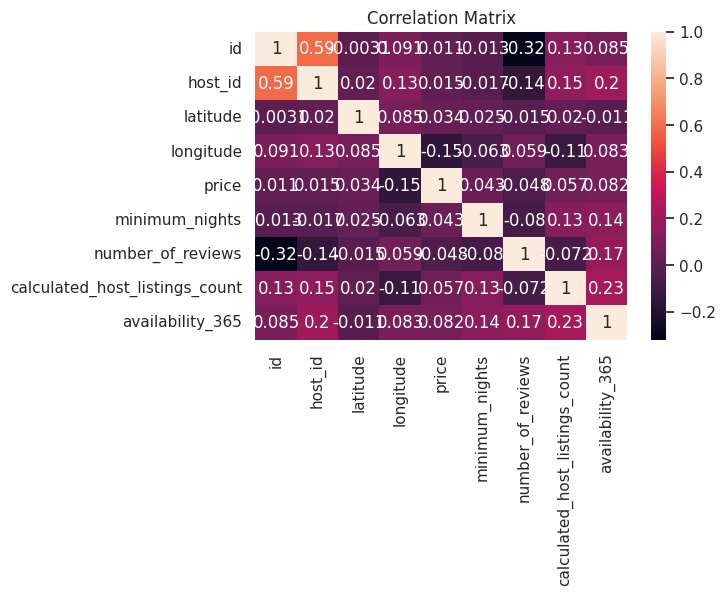

In [ ]:
plt.title("Correlation Matrix")
sns.heatmap(ab_nyc.corr(), annot=True);

<ipython-input-48-5658fb6633c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numerical_columns.corr()


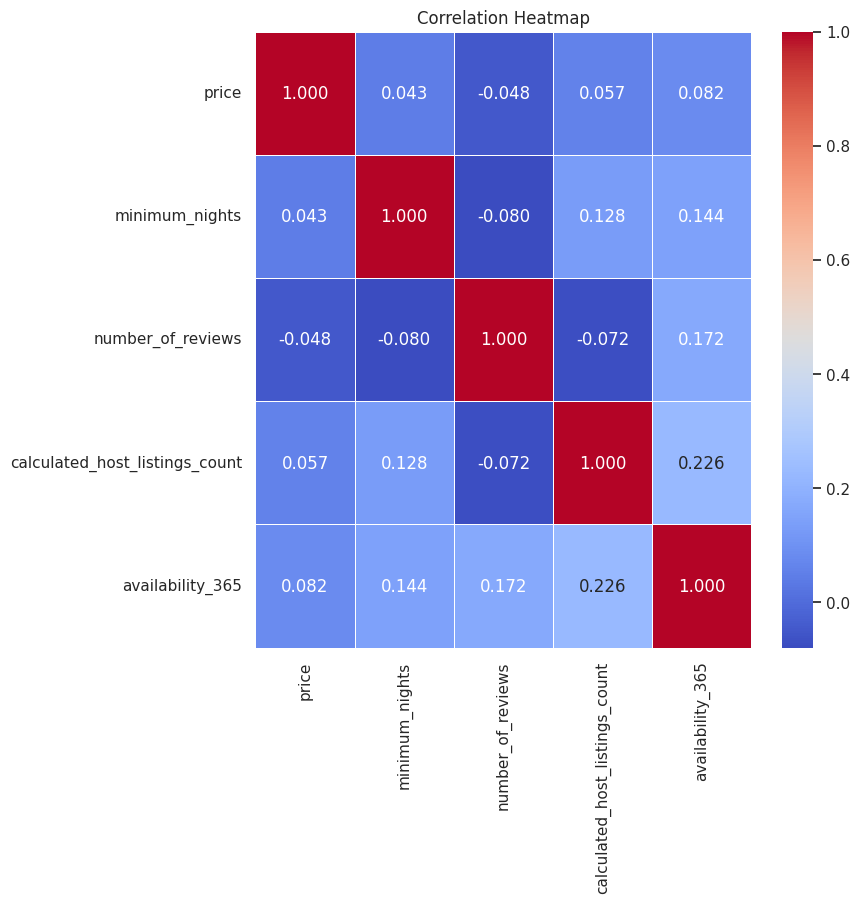

In [ ]:
numerical_columns = ab_nyc[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

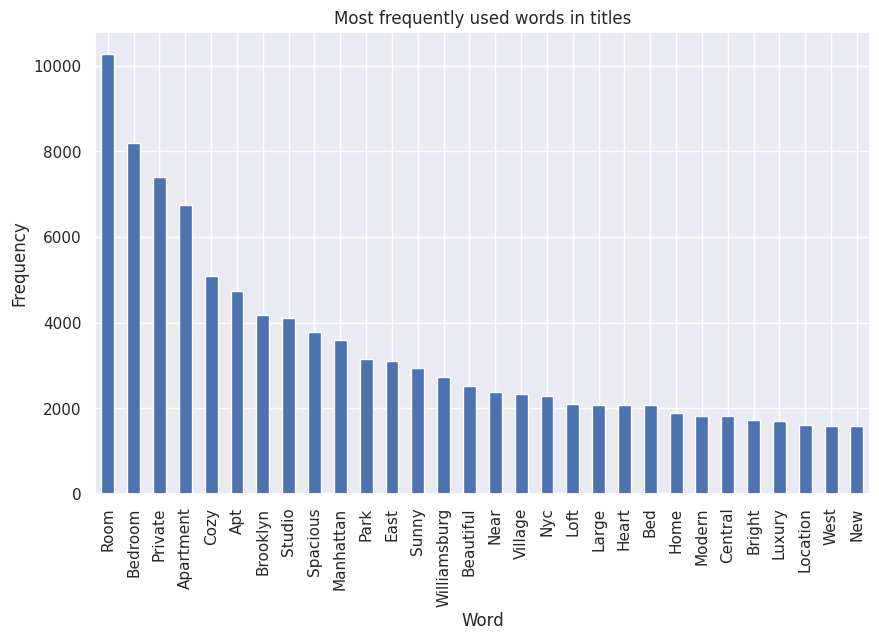

In [ ]:
# Let's find the most frequently encountered words in ad titles
name_list = ab_nyc['name']
names_used = []
pattern = r'\W+'
excluded_words = set(['on', 'in', 'at', 'and', 'the', 'to', 'w', 'of', 'a', 'an', 'for', 'with','from'])

for i in name_list:
    x = re.split(pattern, i)
    for adj in x:
        if len(adj) > 0 and not adj.isnumeric() and adj.lower() not in excluded_words:
            names_used.append(adj.lower())

word_counts_30 = pd.Series(names_used).str.capitalize().value_counts().nlargest(30)

plt.figure(figsize=(10, 6))
word_counts_30.plot(kind='bar')
plt.title('Most frequently used words in titles')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Class Frequencies of room_type Variable')

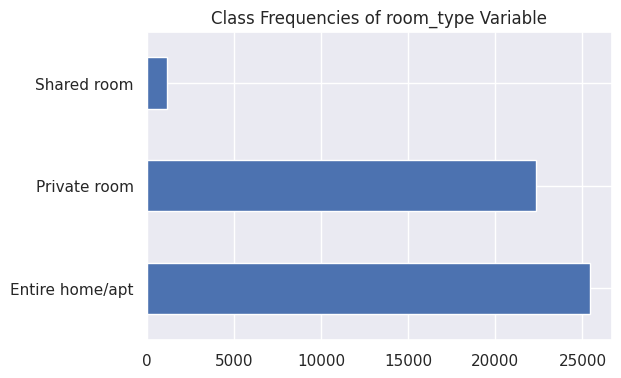

In [ ]:
ab_nyc["room_type"].value_counts().plot.barh().set_title("Class Frequencies of room_type Variable")

Text(0.5, 1.0, 'Class Frequencies of room_type Variable')

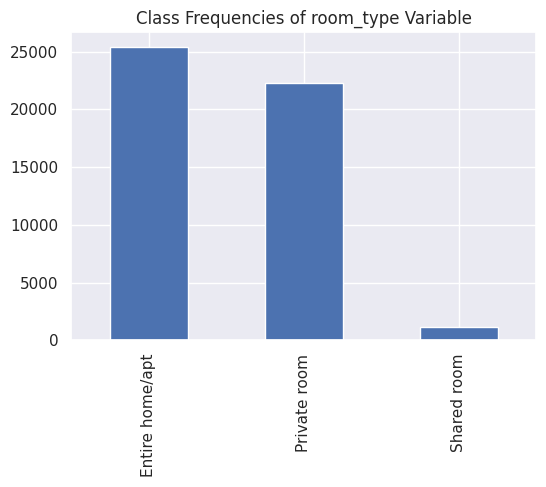

In [ ]:
ab_nyc["room_type"].value_counts().plot.bar().set_title("Class Frequencies of room_type Variable")

In [ ]:
ab_nyc["room_type"].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            48885, 48886, 48887, 48888, 48889, 48890, 48891, 48892, 48893,
            48894],
           dtype='int64', length=48884)

Text(0.5, 1.0, 'room_type Density')

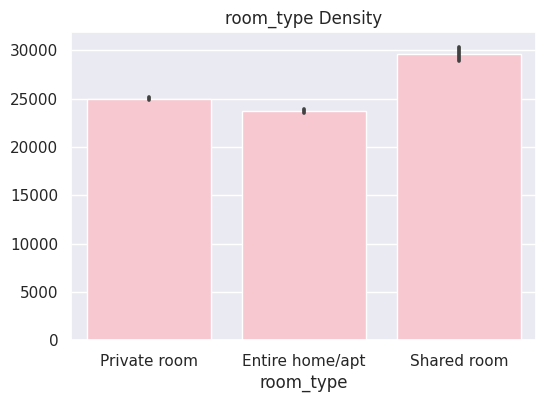

In [ ]:
sns.barplot(x="room_type", y=ab_nyc["room_type"].index, data=ab_nyc, color="pink").set_title("room_type Density")#??

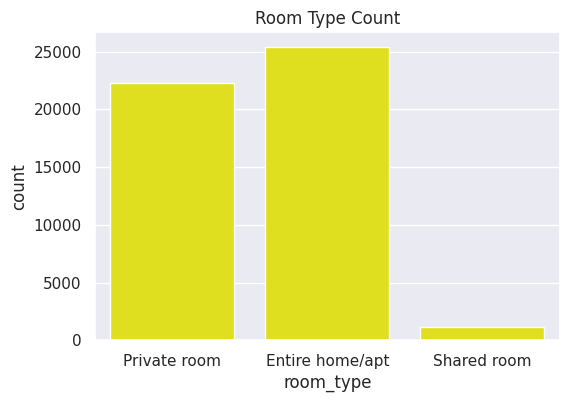

In [ ]:
## bu şekilde oluyormuş
sns_plot= sns.countplot(x="room_type", data=ab_nyc, color="yellow").set_title("Room Type Count")

Text(0.5, 1.0, 'room_type - price - neighbourhood_group')

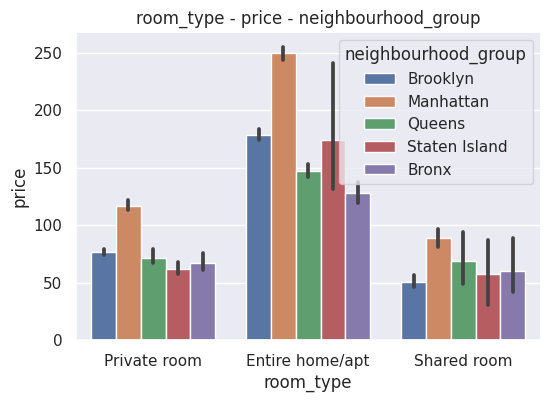

In [ ]:
sns.barplot(x="room_type", y="price", hue="neighbourhood_group", data=ab_nyc)
plt.title("room_type - price - neighbourhood_group")

<Axes: xlabel='room_type', ylabel='count'>

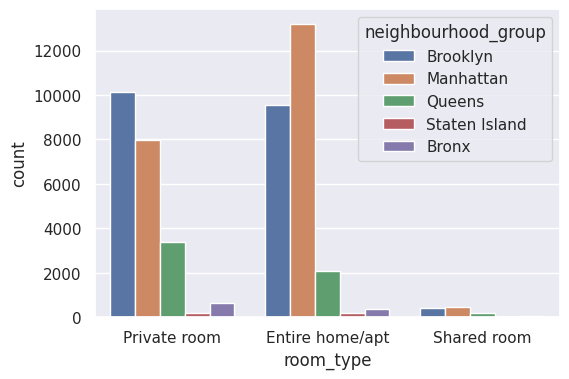

In [ ]:
sns.countplot(x="room_type", hue="neighbourhood_group", data=ab_nyc)
#plt.title("room_type - price - neighbourhood_group")

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Manhattan'),
  Text(3, 0, 'Queens'),
  Text(4, 0, 'Staten Island')])

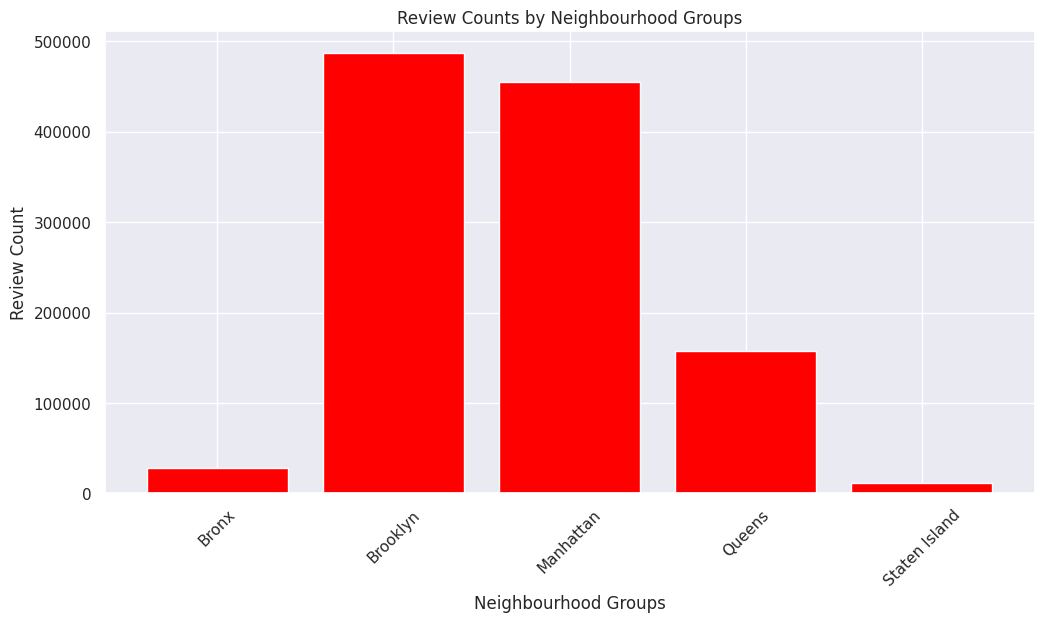

In [ ]:
grouped_data = ab_nyc.groupby('neighbourhood_group')['number_of_reviews'].sum()

plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data.values,color="red")
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Review Count')
plt.title('Review Counts by Neighbourhood Groups')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'room_type - price - reviews_per_month')

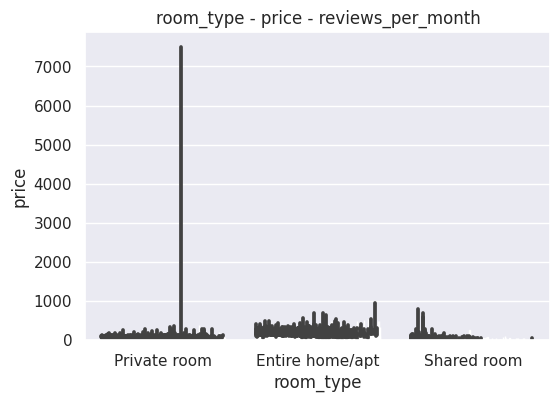

In [ ]:
sns.barplot(x="room_type", y="price", hue="reviews_per_month", data=ab_nyc )
plt.legend([],[], frameon=False)
plt.title("room_type - price - reviews_per_month")

<ipython-input-59-fd3226e3bfb8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ab_nyc.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))


<Axes: >

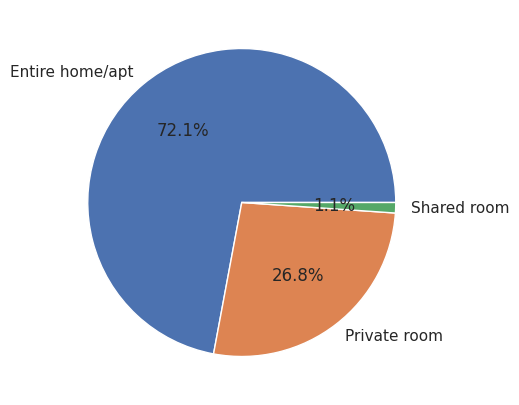

In [ ]:
ab_nyc.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))

In [ ]:
ab_nyc.groupby("room_type").sum()

<ipython-input-60-4e34d8b4780f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ab_nyc.groupby("room_type").sum()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
room_type,,,,,,,,,
Entire home/apt,468454041897,1569132690860,1.034793e+06,-1.879119e+06,5381480,216144,580400,271832,2843710
Private room,434521096387,1617662782214,9.090353e+05,-1.650332e+06,2004450,120054,537979,72029,2481954
Shared room,26641790608,118840064412,4.716601e+04,-8.562646e+04,81348,7451,19249,5397,187449


<ipython-input-61-c289ae96fc42>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ab_nyc.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.2f%%", ylabel="", legend=False, figsize=(5,5))


<Axes: >

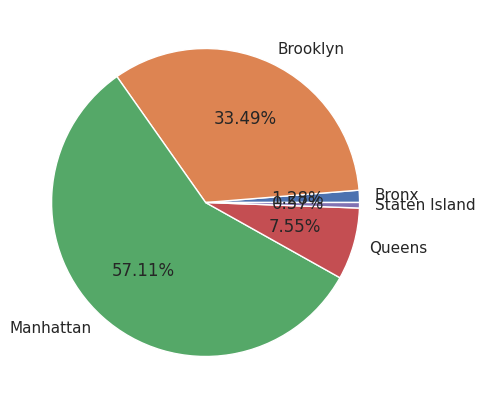

In [ ]:
ab_nyc.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.2f%%", ylabel="", legend=False, figsize=(5,5))

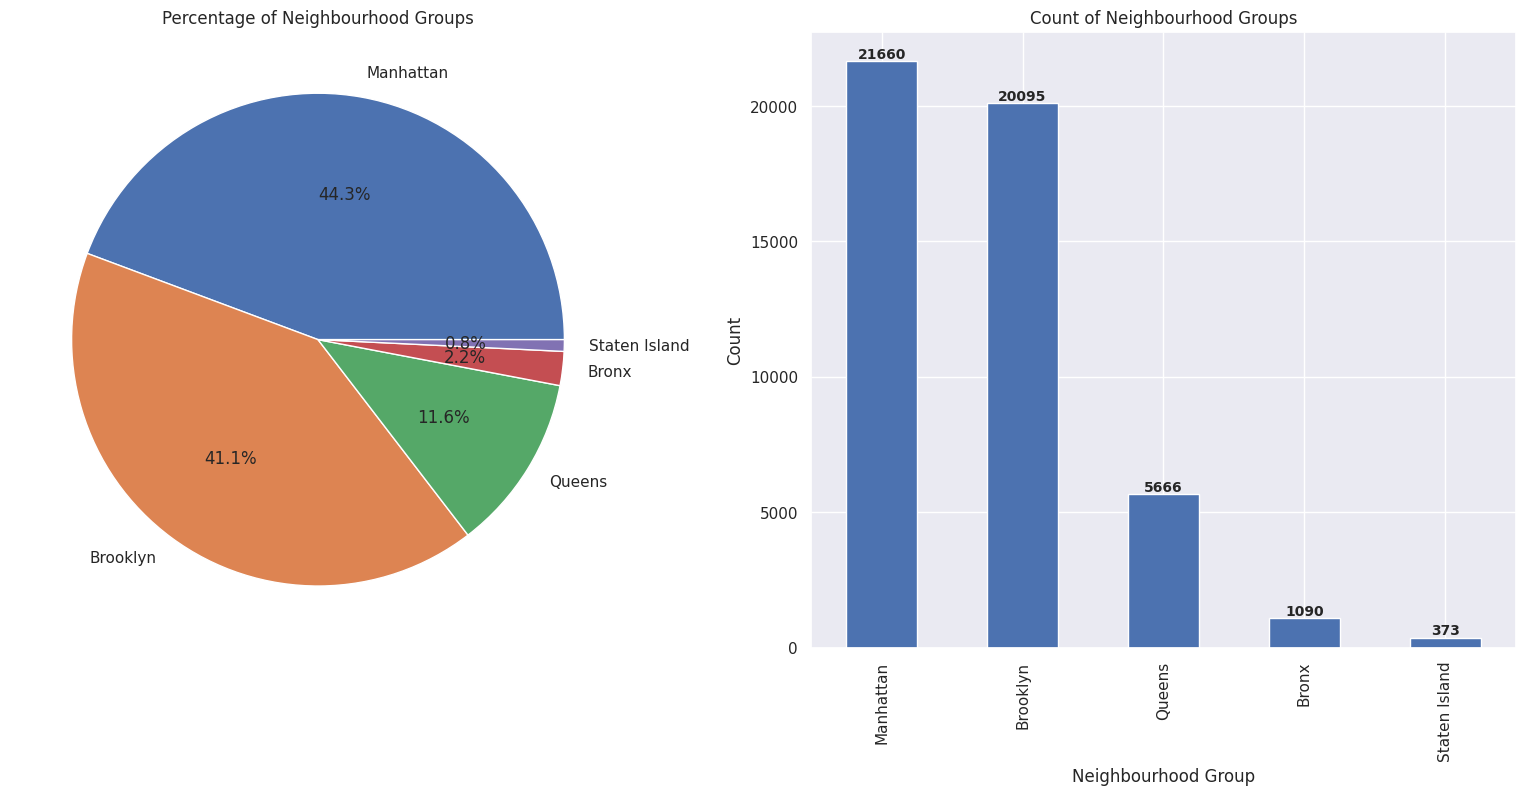

In [ ]:
neighbour_counts = ab_nyc['neighbourhood_group'].value_counts()
total_count = neighbour_counts.sum()

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Pie chart on the left side
axes[0].pie(neighbour_counts, labels=neighbour_counts.index, autopct='%1.1f%%')
axes[0].set_title('Percentage of Neighbourhood Groups')

 # Bar chart on the right side
neighbour_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Count of Neighbourhood Groups')
axes[1].set_xlabel('Neighbourhood Group')
axes[1].set_ylabel('Count')

for i, count in enumerate(neighbour_counts):
        axes[1].text(
            x=i,
            y=count,
            s=str(count),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )
plt.show()

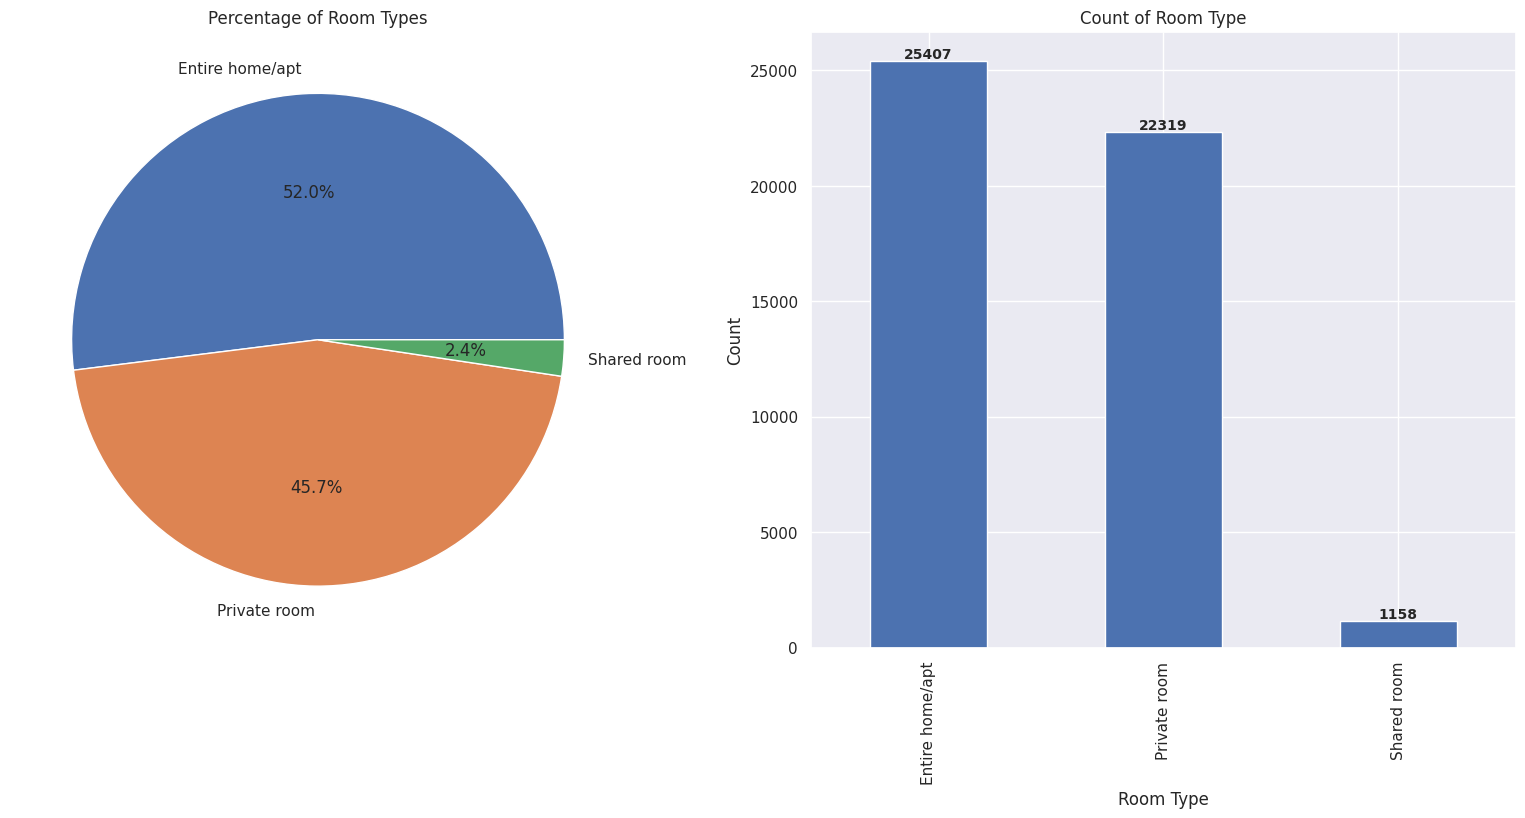

In [ ]:
neighbour_counts = ab_nyc['room_type'].value_counts()
total_count = neighbour_counts.sum()

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Pie chart on the left side
axes[0].pie(neighbour_counts, labels=neighbour_counts.index, autopct='%1.1f%%')
axes[0].set_title('Percentage of Room Types')

 # Bar chart on the right side
neighbour_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Count of Room Type')
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('Count')

for i, count in enumerate(neighbour_counts):
        axes[1].text(
            x=i,
            y=count,
            s=str(count),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )
plt.show()

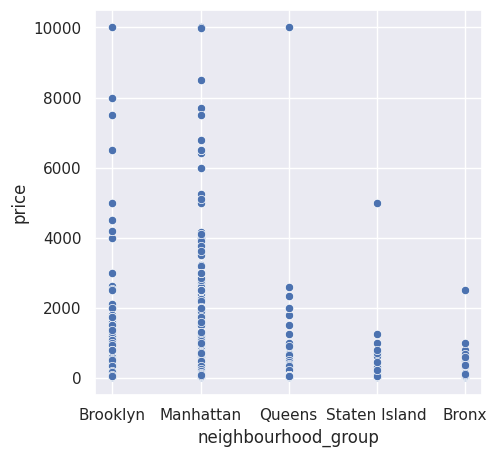

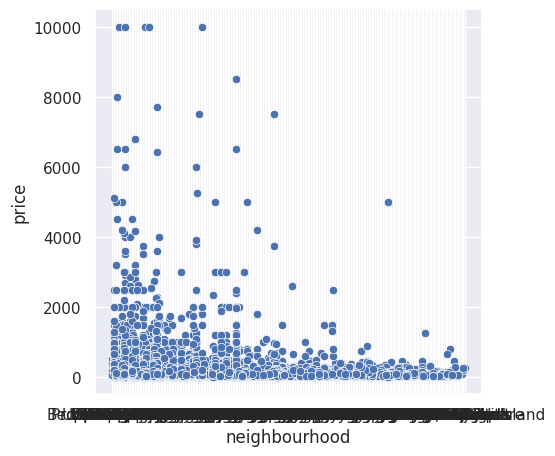

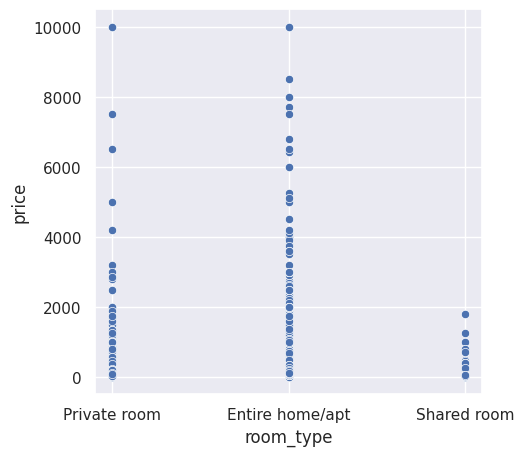

In [ ]:
cols = ["neighbourhood_group", "neighbourhood", "room_type"]

for col in cols:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x= col, y="price", data=ab_nyc)

<Axes: xlabel='price', ylabel='Count'>

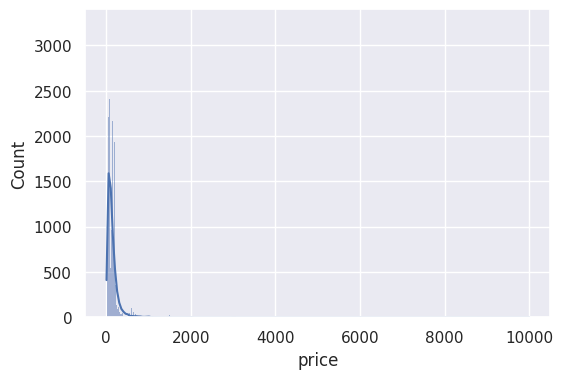

In [ ]:
sns.histplot(ab_nyc["price"], kde=True) # bins= auto

Text(0.5, 1.0, '0-1000 Price Distribution')

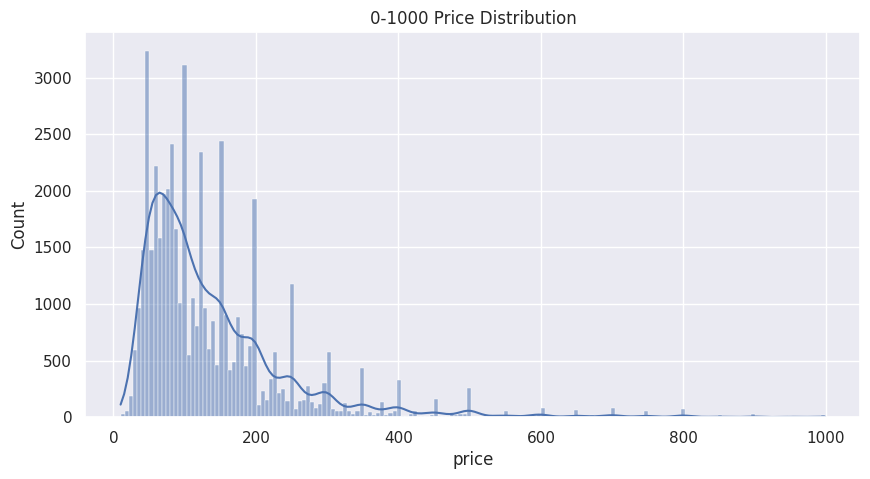

In [ ]:
filtered_data0to1000 = ab_nyc[ab_nyc["price"] < 1000]
plt.figure(figsize=(10,5))
sns.histplot(filtered_data0to1000["price"], kde=True) # bins= auto
plt.title("0-1000 Price Distribution")


<Axes: xlabel='price', ylabel='Count'>

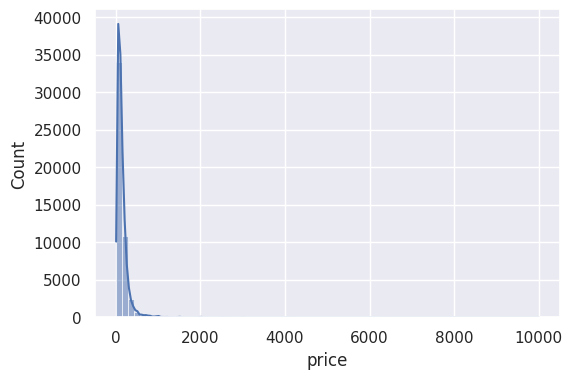

In [ ]:
sns.histplot(ab_nyc["price"], kde=True, bins=70) # bins= auto

Text(0.5, 1.0, '0-100 Price Distribution')

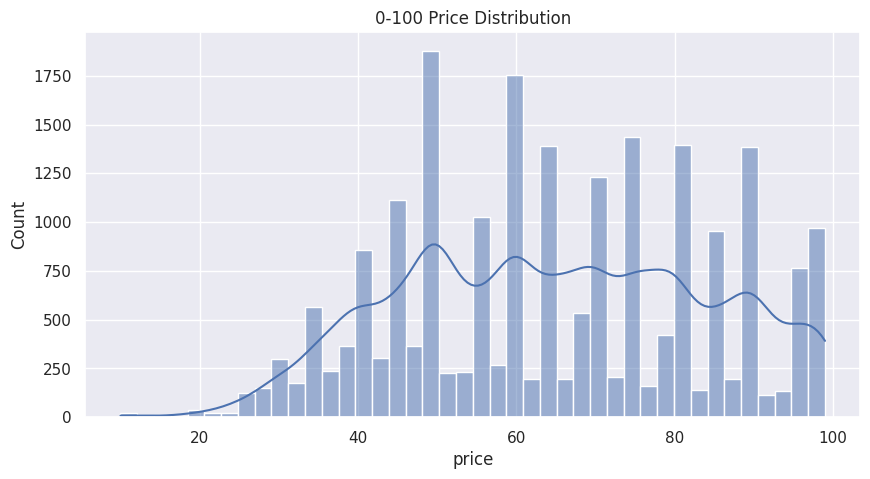

In [ ]:
filtered_data0to1000 = ab_nyc[ab_nyc["price"] < 100]
plt.figure(figsize=(10,5))
sns.histplot(filtered_data0to1000["price"], kde=True) # bins= auto
plt.title("0-100 Price Distribution")

<Axes: xlabel='price', ylabel='Density'>

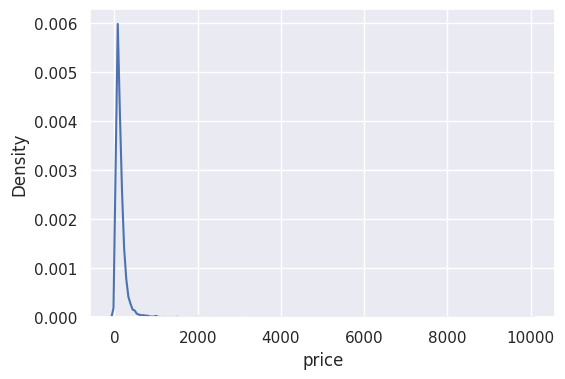

In [ ]:
sns.kdeplot(ab_nyc["price"])

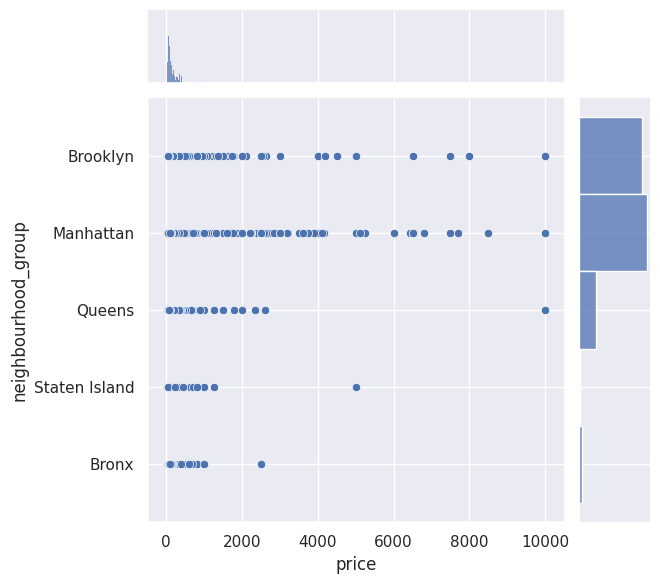

In [ ]:
sns.jointplot(x="price", y=ab_nyc["neighbourhood_group"], data=ab_nyc)

Text(0.5, 1.0, 'neighbourhood_group - Price')

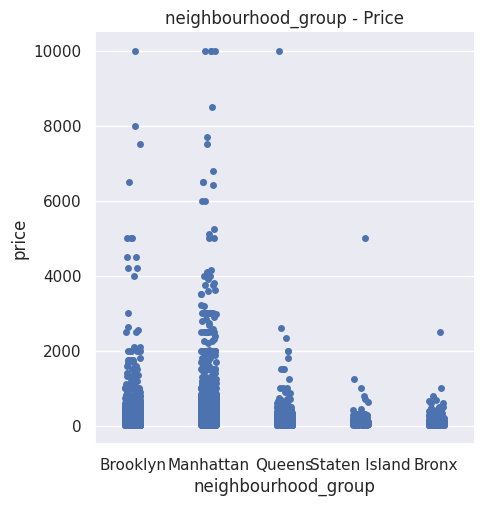

In [ ]:
sns.catplot(x="neighbourhood_group", y="price", data=ab_nyc)
plt.title("neighbourhood_group - Price")

Text(0.5, 1.0, 'room_type - Price')

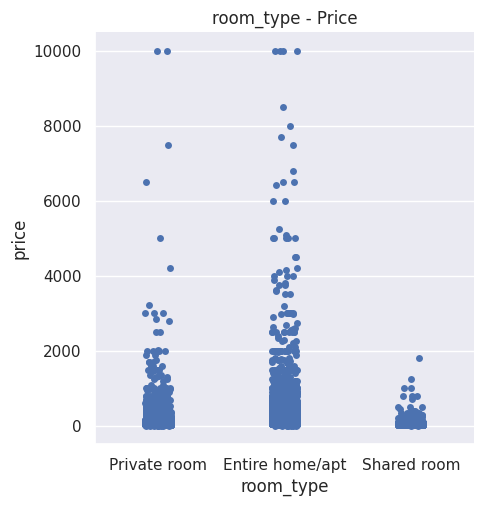

In [ ]:
sns.catplot(x="room_type", y="price", data=ab_nyc)
plt.title("room_type - Price")

Text(0.5, 1.0, 'room_type - Price')

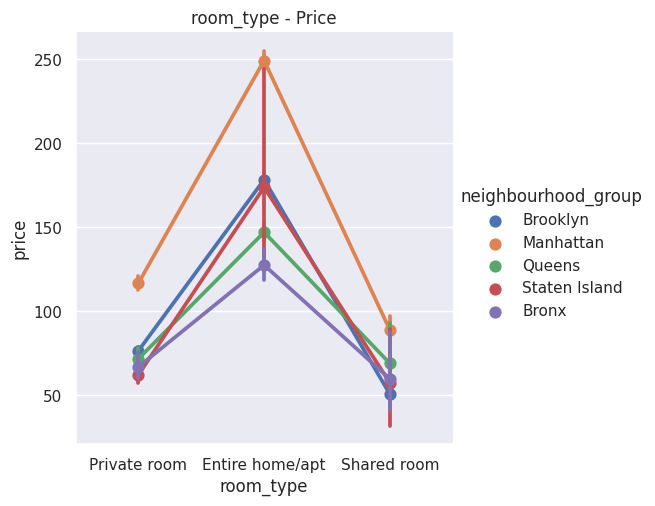

In [ ]:
sns.catplot(x="room_type", y="price", hue="neighbourhood_group", kind="point", data=ab_nyc)
plt.title("room_type - Price")

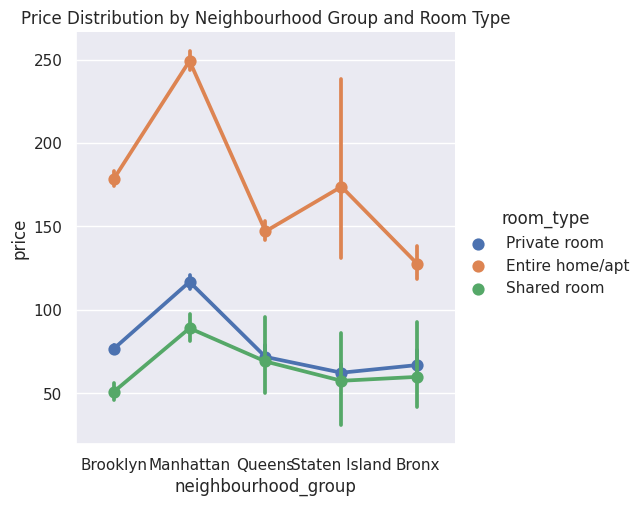

In [ ]:
sns.catplot(x="neighbourhood_group", y="price", hue="room_type", kind="point", data=ab_nyc)
plt.title("Price Distribution by Neighbourhood Group and Room Type")
plt.show()


<ipython-input-76-77279fa97648>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ab_nyc["price"], shade=True)


<Axes: xlabel='price', ylabel='Density'>

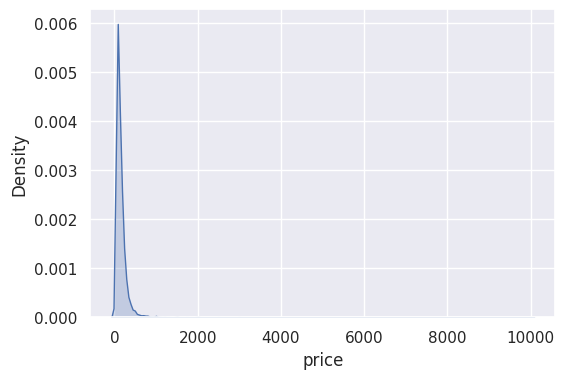

In [ ]:
sns.kdeplot(ab_nyc["price"], shade=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


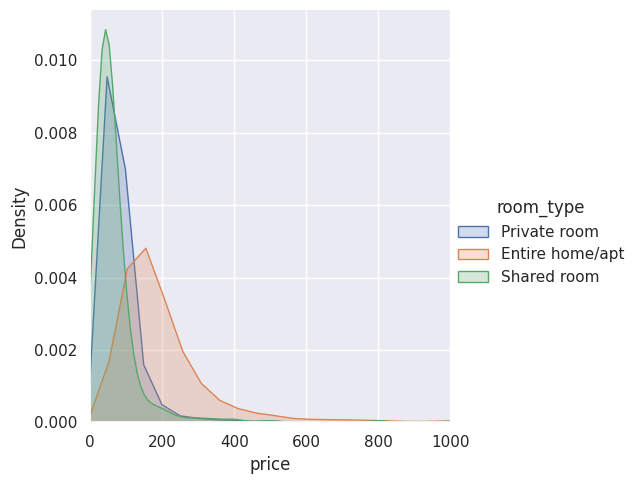

In [ ]:
#filtered_ab_nyc = ab_nyc[ab_nyc["price"] > 100]
(sns.FacetGrid(ab_nyc, hue="room_type", height=5, xlim=(0, 1000)).map(sns.kdeplot, "price", shade=True).add_legend())

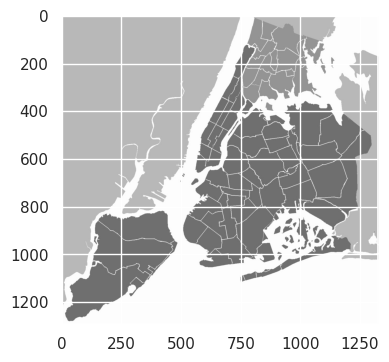

In [ ]:
with Image.open("New_York_City_.png") as bg:
    plt.imshow(bg)

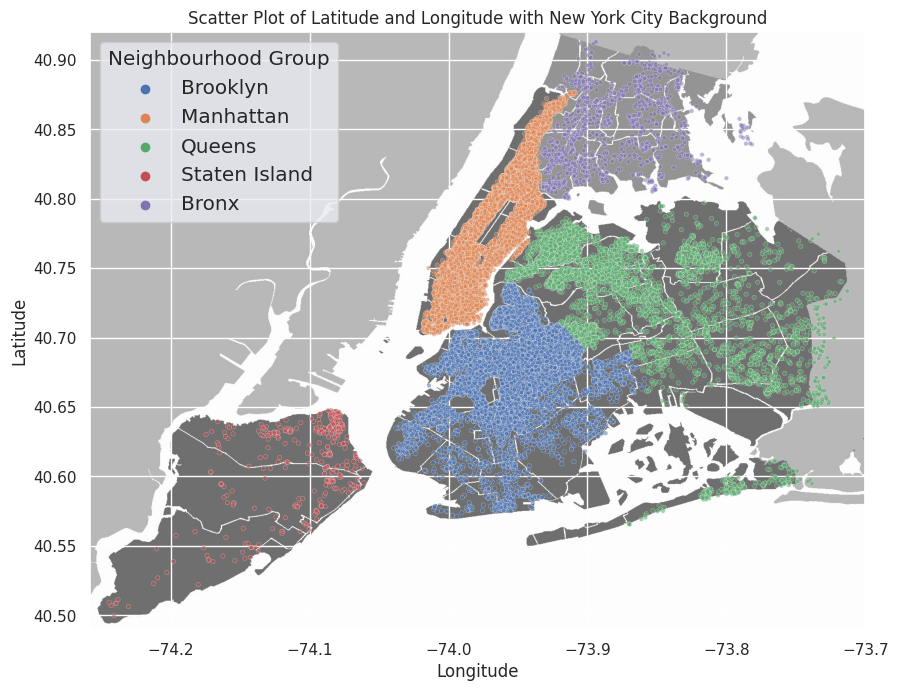

In [ ]:
plt.figure(figsize=(10, 8))

plt.imshow(bg,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])

sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=ab_nyc, s=10, alpha=0.5)

plt.title('Scatter Plot of Latitude and Longitude with New York City Background')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group', title_fontsize='large', fontsize='large')
plt.show()

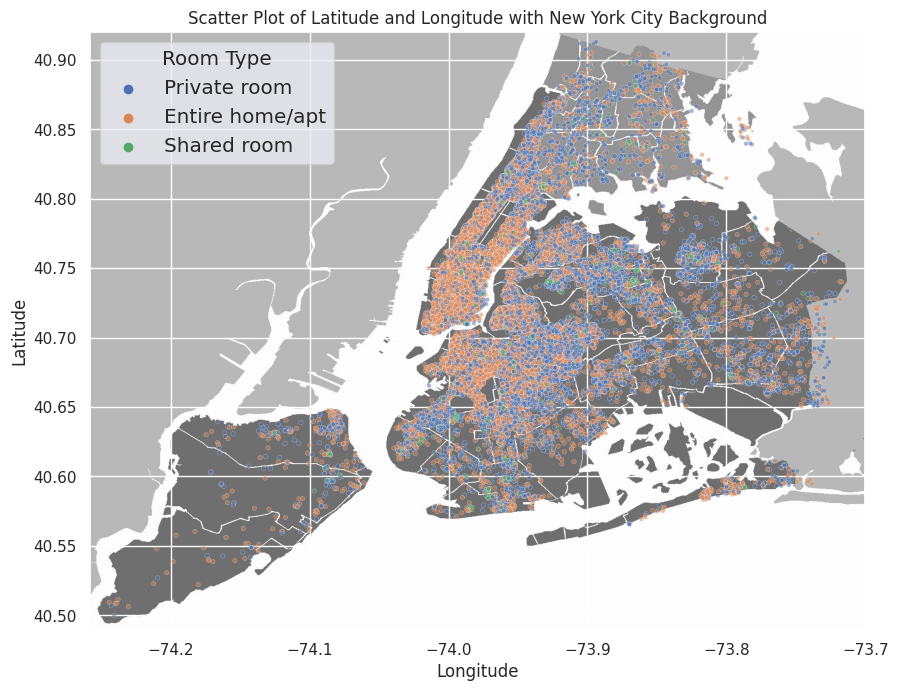

In [ ]:
plt.figure(figsize=(10, 8))

plt.imshow(bg,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])

sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=ab_nyc, s=10, alpha=0.5)

plt.title('Scatter Plot of Latitude and Longitude with New York City Background')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Room Type', title_fontsize='large', fontsize='large')
plt.show()

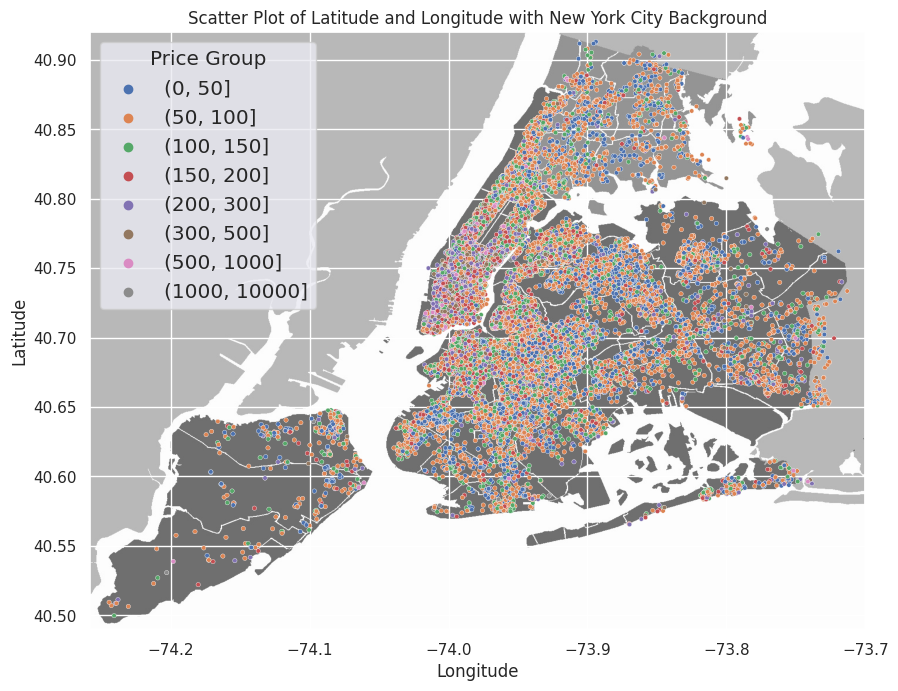

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(bg,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
price_bins = [0, 50, 100, 150, 200, 300, 500, 1000, ab_nyc['price'].max()]
ab_nyc['price_group'] = pd.cut(ab_nyc['price'], bins=price_bins)
sns.scatterplot(x='longitude', y='latitude', hue='price_group', data=ab_nyc, s=10)
plt.title('Scatter Plot of Latitude and Longitude with New York City Background')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price Group', title_fontsize='large', fontsize='large')
plt.show()

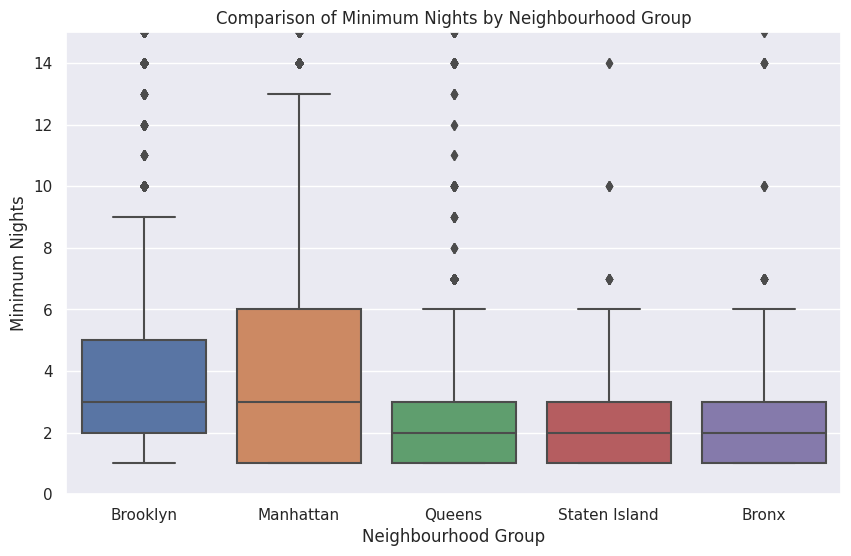

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='minimum_nights', data=ab_nyc)
plt.ylim(0, 15)
plt.title('Comparison of Minimum Nights by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Minimum Nights')
plt.show()